In [1]:
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from CML_tool.ShapUtils import calculate_shap_values

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Set up binary classification problem
iris_data = load_iris()
X = iris_data.data
y = iris_data.target
y = np.where(y == 2, 1, 0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_test.shape

(30, 4)

In [3]:
# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Train a random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [4]:
# Logistic regression
# warnings.filterwarnings("ignore", category=UserWarning) # Ignore the function warnings
warnings.filterwarnings("default", category=UserWarning) # See the function warnings

log_shap = calculate_shap_values(
    model=log_reg,
    background_data=X_train,
    training_outcome=y_train,
    test_data=X_test,
    pretrained=True,
    explainer_type='linear',
    link_function='identity',
    feature_perturbation='observational'
    )

                LinearExplainer ignores the passed link function and always uses identity pre logistic transformation.
                Hence, shapley values are computed in log-odds space.
                For marginal probability contributions apply a logistic function to the provided output.
                
                The LinearExplainer uses the Impute masker intead of the Partition masker.
                          


In [14]:
# Tree-based models
# warnings.filterwarnings("ignore", category=UserWarning) # Ignore the function warnings
warnings.filterwarnings("default", category=UserWarning) # See the function warnings

log_shap = calculate_shap_values(
    model=rf,
    background_data=X_train,
    training_outcome=y_train,
    test_data=X_test,
    pretrained=True,
    explainer_type='tree',
    link_function='identity',
    feature_perturbation='interventional'
    )

Provided Shapley values are in probability units.


In [6]:
log_shap.shape

(30, 4)

(array([1., 1., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([-0.32545757, -0.29262884, -0.25980011, -0.22697139, -0.19414266,
        -0.16131393, -0.12848521, -0.09565648, -0.06282776, -0.02999903,
         0.0028297 ]),
 <BarContainer object of 10 artists>)

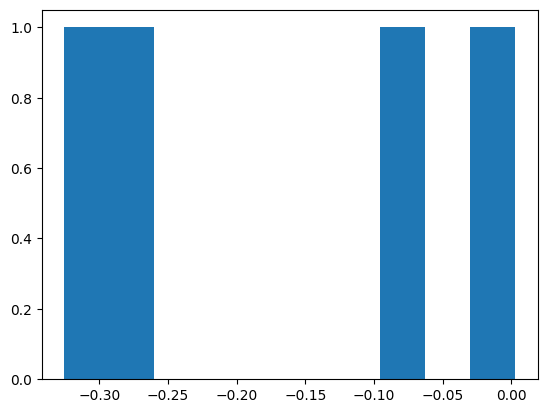

In [7]:
plt.hist(log_shap[0])

In [8]:
rf.estimator_

DecisionTreeClassifier()

In [9]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=504824530),
 DecisionTreeClassifier(max_features='sqrt', random_state=1757045504),
 DecisionTreeClassifier(max_features='sqrt', random_state=1421788827),
 DecisionTreeClassifier(max_features='sqrt', random_state=8917689),
 DecisionTreeClassifier(max_features='sqrt', random_state=829282626),
 DecisionTreeClassifier(max_features='sqrt', random_state=1305001312),
 DecisionTreeClassifier(max_features='sqrt', random_state=895592928),
 DecisionTreeClassifier(max_features='sqrt', random_state=512644398),
 DecisionTreeClassifier(max_features='sqrt', random_state=1727666424),
 DecisionTreeClassifier(max_features='sqrt', random_state=517361418),
 DecisionTreeClassifier(max_features='sqrt', random_state=1582944429),
 DecisionTreeClassifier(max_features='sqrt', random_state=2105938026),
 DecisionTreeClassifier(max_features='sqrt', random_state=2012483675),
 DecisionTreeClassifier(max_features='sqrt', random_state=262910721),
 DecisionTreeCl

In [10]:
rf.estimators_[0].tree_.value.dtype.type

numpy.float64